## Smitesh Patil 22223696

In [1]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegressionSGD:
    def __init__(self, epoch, alpha, threshold):
        self.epoch = epoch
        self.alpha = alpha
        self.threshold = threshold
        self.weight = None
        self.bias = None
        self.error = []
        
    def fit(self, X, y, x_val, y_val):
        self.error = []
        self.weight = np.random.rand(np.shape(X)[1])
        self.bias = np.random.rand(1)
        for i in range(self.epoch):
            error = 0
            pred = sigmoid(np.dot(X, self.weight) + self.bias)
            for x, y_pred, y_act in zip(X, pred, y):
                error += (y_pred - y_act)**2
                dw = np.dot(x.T, (y_pred-y_act))
                db = y_pred - y_act
                self.weight -= self.alpha*dw
                self.bias -= self.alpha*db     
            self.error.append(1/len(X)*error)
            
            pred = self.predict(x_val)
            print("Epoch :", i,"loss: ", np.round(1/len(X)*error,2), " validation set accuracy: ", np.round(accuracy_score(y_val, pred),2))
            
    def predict_prob(self, X):
        pred = sigmoid(np.dot(X, self.weight) + self.bias)
        return pred
    
    def predict(self, X):
        pred = sigmoid(np.dot(X, self.weight) + self.bias)
        roundoff = lambda x: [1 if ele >= self.threshold else 0 for ele in x] 
        pred = roundoff(pred)
        return pred

# Part 2

In [3]:
def evaluate(labels, predictions):
    
  assert len(labels) == len(predictions)

  score = 0.0
  
  true_positive = 0
  true_negative = 0
  false_positive = 0
  false_negative = 0

  #populating variables
  for label, prediction in zip(labels, predictions):
        if label == 1 and prediction == 1:
            true_positive += 1
        elif label == 0 and prediction == 0:
            true_negative += 1
        elif label == 0 and prediction == 1:
            false_positive += 1
        else:
            false_negative += 1
  #calculating precision, recall, f1score and accuracy for two classes
  accuracy_score = (true_positive + true_negative) / (true_positive + true_negative + false_positive  + false_negative)
  f1_score = true_positive/(true_positive + 0.5*(false_positive + false_negative))

  score = """ True Positive: %s \t False Positive: %s \n False Negative: %s \t True Negative: %s 
  \n\n Accurarcy: %s
  \n F1 Score : %s"""% (true_positive, false_negative, false_positive, true_negative, accuracy_score, f1_score)
    
  return print(score)


# Linearly non-separable data

In [4]:
# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("moons500.csv")

# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The x values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5)

In [6]:
# Some examples of working with the data, to look at rows/columns
print ("len(X):", len(X))            # outer array: one per sample
print ("len(X[0]):", len(X[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y))
print ("np.shape(y):", np.shape(y))

# You can transpose the y data using 'reshape'
yt = np.reshape(y, (len(y),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X): 500
len(X[0]): 2
len(X[:,0]): 500
X: nsamples = 500 , nattribs = 2
len(y) 500
np.shape(y): (500,)
np.shape(yt): (500, 1)
y transpose: nsamples = 500 , nattribs = 1


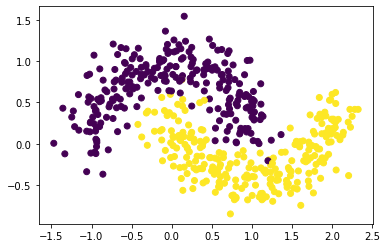

In [7]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)  

In [8]:
lr = LogisticRegressionSGD(10, 0.01, 0.5)

In [9]:
lr.fit(x_train, y_train, x_val, y_val)

pred = lr.predict(x_test)

Epoch : 0 loss:  0.31  validation set accuracy:  0.79
Epoch : 1 loss:  0.17  validation set accuracy:  0.8
Epoch : 2 loss:  0.13  validation set accuracy:  0.81
Epoch : 3 loss:  0.12  validation set accuracy:  0.84
Epoch : 4 loss:  0.11  validation set accuracy:  0.84
Epoch : 5 loss:  0.11  validation set accuracy:  0.84
Epoch : 6 loss:  0.1  validation set accuracy:  0.84
Epoch : 7 loss:  0.1  validation set accuracy:  0.85
Epoch : 8 loss:  0.1  validation set accuracy:  0.85
Epoch : 9 loss:  0.1  validation set accuracy:  0.85


In [10]:
evaluate(y_test, pred)

 True Positive: 34 	 False Positive: 7 
 False Negative: 5 	 True Negative: 29 
  

 Accurarcy: 0.84
  
 F1 Score : 0.85


In [11]:
pred = lr.predict_prob(x_test)

tpr_lr_nsd, fpr_lr_nsd, _ = roc_curve(y_test, pred)
auc_lr_nsd = roc_auc_score(y_test, pred)

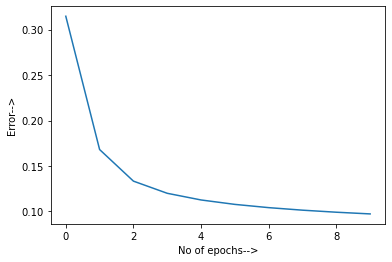

In [12]:
plt.plot(list(range(0, len(lr.error))), lr.error)
plt.xlabel("No of epochs-->")
plt.ylabel("Error-->")
plt.show()

# Linearly seperable dataset

In [13]:
# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("blobs400.csv")

# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The x values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array

In [14]:
# Some examples of working with the data, to look at rows/columns
print ("len(X):", len(X))            # outer array: one per sample
print ("len(X[0]):", len(X[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y))
print ("np.shape(y):", np.shape(y))

# You can transpose the y data using 'reshape'
yt = np.reshape(y, (len(y),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X): 400
len(X[0]): 3
len(X[:,0]): 400
X: nsamples = 400 , nattribs = 3
len(y) 400
np.shape(y): (400,)
np.shape(yt): (400, 1)
y transpose: nsamples = 400 , nattribs = 1


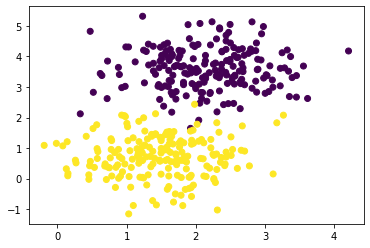

In [15]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)  

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50, random_state=42)

In [17]:
lr = LogisticRegressionSGD(25, 0.1, 0.6)

In [18]:
lr.fit(x_train, y_train, x_val, y_val)
pred = lr.predict(x_test)

Epoch : 0 loss:  0.51  validation set accuracy:  0.53
Epoch : 1 loss:  0.49  validation set accuracy:  0.57
Epoch : 2 loss:  0.46  validation set accuracy:  0.85
Epoch : 3 loss:  0.12  validation set accuracy:  0.9
Epoch : 4 loss:  0.06  validation set accuracy:  0.92
Epoch : 5 loss:  0.06  validation set accuracy:  0.92
Epoch : 6 loss:  0.05  validation set accuracy:  0.92
Epoch : 7 loss:  0.05  validation set accuracy:  0.93
Epoch : 8 loss:  0.05  validation set accuracy:  0.93
Epoch : 9 loss:  0.04  validation set accuracy:  0.93
Epoch : 10 loss:  0.04  validation set accuracy:  0.93
Epoch : 11 loss:  0.04  validation set accuracy:  0.93
Epoch : 12 loss:  0.04  validation set accuracy:  0.93
Epoch : 13 loss:  0.03  validation set accuracy:  0.93
Epoch : 14 loss:  0.03  validation set accuracy:  0.95
Epoch : 15 loss:  0.03  validation set accuracy:  0.95
Epoch : 16 loss:  0.03  validation set accuracy:  0.95
Epoch : 17 loss:  0.03  validation set accuracy:  0.95
Epoch : 18 loss:  0.0

In [19]:
evaluate(y_test, pred)

 True Positive: 33 	 False Positive: 1 
 False Negative: 0 	 True Negative: 26 
  

 Accurarcy: 0.9833333333333333
  
 F1 Score : 0.9850746268656716


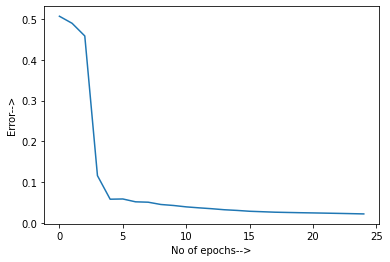

In [20]:
plt.plot(list(range(0, len(lr.error))), lr.error)
plt.xlabel("No of epochs-->")
plt.ylabel("Error-->")
plt.show()

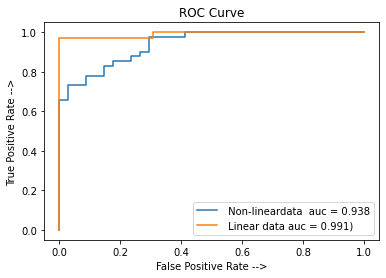

In [21]:
pred = lr.predict_prob(x_test)
tpr_lr_sd, fpr_lr_sd, _ = roc_curve(y_test, pred)
auc_lr_sd = roc_auc_score(y_test, pred)

plt.plot(tpr_lr_nsd, fpr_lr_nsd, linestyle='-', label=' Non-lineardata  auc = %0.3f' % auc_lr_nsd)
plt.plot(tpr_lr_sd, fpr_lr_sd, linestyle='-', label=' Linear data auc = %0.3f)' % auc_lr_sd)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
    
plt.legend()
plt.title("ROC Curve")
plt.savefig("Roc curve")
plt.show()

# Shallow Neural Network

In [22]:
class shallowNeuralNet:
    def __init__(self, epochs, learning_rate, hidden_nodes):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = [None, None]
        self.bias = [None, None]
        self.hidden_nodes = hidden_nodes
        self.error_list = []
        
    def sigmoid(self, val):
        return 1/(1 + np.exp(-val))
    
    def sigmoid_derivative(self, val):
        return sigmoid(val) * (1 - sigmoid(val))
    
    def fit(self, X_full, Y_full, x_val, y_val):
        self.weights[0] = np.random.randn(self.hidden_nodes, X_full.shape[0]) * 0.01
        self.bias[0] = np.zeros((self.hidden_nodes, 1))
        self.weights[1] = np.random.randn(Y_full.shape[0], self.hidden_nodes) * 0.01
        self.bias[1] = np.zeros((Y_full.shape[0], 1))
        self.error_list = []
        for i in range(0, self.epochs):
            error = 0
            for X, Y in zip(X_full.T, Y_full.T):
                X = X.reshape(1, X.shape[0])
                Y = Y.reshape(1, Y.shape[0])
                
                self.Z1 = np.dot(self.weights[0], X.T) + self.bias[0]
                self.A1 = sigmoid(self.Z1)
                self.Z2 = np.dot(self.weights[1], self.A1) + self.bias[1]
                self.A2 = sigmoid(self.Z2)
                
                error += (np.squeeze(self.A2) - np.squeeze(Y))**2
                
                dZ2 = self.A2 - Y
                dW2 = np.dot(dZ2, self.A1.T)
                dB2 = np.sum(dZ2, axis = 1, keepdims= True)
                dZ1 = np.multiply(np.dot(self.weights[1].T, dZ2),self.sigmoid_derivative(self.A1))
                dW1 = np.dot(dZ1, X)
                dB1 = np.sum(dZ1, axis = 1, keepdims= True)

                self.weights[0] -= self.learning_rate * dW1
                self.bias[0] -= self.learning_rate * dB1
                self.weights[1] -= self.learning_rate * dW2
                self.bias[1] -= self.learning_rate * dB2
            self.error_list.append(error)
            
            pred = self.predict(x_val)
            if self.epochs > 100:
                if i % 50 == 0:
                    print("Epoch :", i,"loss: ", np.round(1/len(X)*error,2), "Valdation set accuracy: ", accuracy_score(pred[0], y_val[0]))
            else:
                print("Epoch :", i,"loss: ", np.round(1/len(X)*error,2), "Valdation set accuracy: ", accuracy_score(pred[0], y_val[0]))
                
            
    def predict_prob(self, pred):
        layer1 = np.dot(self.weights[0], pred) + self.bias[0]
        activation1 = sigmoid(layer1)
        layer2 = np.dot(self.weights[1], activation1) + self.bias[1]
        activation2 = sigmoid(layer2)
        
        return activation2
    
    def predict(self, pred):
        layer1 = np.dot(self.weights[0], pred) + self.bias[0]
        activation1 = sigmoid(layer1)
        layer2 = np.dot(self.weights[1], activation1) + self.bias[1]
        activation2 = sigmoid(layer2)
        
        return np.round(activation2)

# Linearly Non Separable Data

In [23]:
df = pd.read_csv("moons500.csv")
y = df['Class'].values

del df['Class'] 
X = df.values

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.50, random_state=42)
X_train = X_train.T
Y_train = Y_train.reshape(1, Y_train.shape[0])
X_test = X_test.T
Y_test = Y_test.reshape(1, Y_test.shape[0])
X_val = X_val.T
Y_val = Y_val.reshape(1, Y_val.shape[0])

In [25]:
snn = shallowNeuralNet(1000, 0.001, 10)

In [26]:
snn.fit(X_train, Y_train, X_val, Y_val)

Epoch : 0 loss:  87.52 Valdation set accuracy:  0.4266666666666667
Epoch : 50 loss:  87.38 Valdation set accuracy:  0.4266666666666667
Epoch : 100 loss:  85.96 Valdation set accuracy:  0.4266666666666667
Epoch : 150 loss:  72.38 Valdation set accuracy:  0.84
Epoch : 200 loss:  46.4 Valdation set accuracy:  0.8266666666666667
Epoch : 250 loss:  38.31 Valdation set accuracy:  0.8266666666666667
Epoch : 300 loss:  34.66 Valdation set accuracy:  0.88
Epoch : 350 loss:  32.3 Valdation set accuracy:  0.8933333333333333
Epoch : 400 loss:  30.93 Valdation set accuracy:  0.8933333333333333
Epoch : 450 loss:  30.26 Valdation set accuracy:  0.8933333333333333
Epoch : 500 loss:  29.97 Valdation set accuracy:  0.8933333333333333
Epoch : 550 loss:  29.85 Valdation set accuracy:  0.8933333333333333
Epoch : 600 loss:  29.81 Valdation set accuracy:  0.8933333333333333
Epoch : 650 loss:  29.8 Valdation set accuracy:  0.88
Epoch : 700 loss:  29.81 Valdation set accuracy:  0.8666666666666667
Epoch : 750 l

In [27]:
evaluate(snn.predict(X_test)[0], Y_test[0])

 True Positive: 30 	 False Positive: 4 
 False Negative: 7 	 True Negative: 34 
  

 Accurarcy: 0.8533333333333334
  
 F1 Score : 0.8450704225352113


In [28]:
pred = snn.predict_prob(X_test)

tpr_lr_nsd, fpr_lr_nsd, _ = roc_curve(Y_test[0], pred[0])
auc_lr_nsd = roc_auc_score(Y_test[0], pred[0])

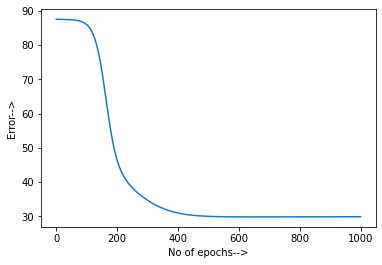

In [29]:
plt.plot(list(range(0, len(snn.error_list))), snn.error_list)
plt.xlabel("No of epochs-->")
plt.ylabel("Error-->")
plt.show()

# Linearly Separable Data

In [30]:
df = pd.read_csv("blobs400.csv")

y = df['Class'].values

del df['Class'] 
X = df.values   

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.50, random_state=42)
X_train = X_train.T
Y_train = Y_train.reshape(1, Y_train.shape[0])
X_test = X_test.T
Y_test = Y_test.reshape(1, Y_test.shape[0])
X_val = X_val.T
Y_val = Y_val.reshape(1, Y_val.shape[0])

In [ ]:
snn = shallowNeuralNet(10, 0.01, 100)

snn.fit(X_train, Y_train, X_val, Y_val)

In [ ]:
evaluate(snn.predict(X_test)[0], Y_test[0])

In [ ]:
plt.plot(list(range(0, len(snn.error_list))), snn.error_list)
plt.xlabel("No of epochs-->")
plt.ylabel("Error-->")
plt.show()

In [ ]:
pred = snn.predict_prob(X_test)
tpr_lr_sd, fpr_lr_sd, _ = roc_curve(Y_test[0], pred[0])
auc_lr_sd = roc_auc_score(Y_test[0], pred[0])

plt.plot(tpr_lr_nsd, fpr_lr_nsd, linestyle='-', label=' Non-lineardata  auc = %0.3f' % auc_lr_nsd)
plt.plot(tpr_lr_sd, fpr_lr_sd, linestyle='-', label=' Linear data auc = %0.3f)' % auc_lr_sd)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
    
plt.legend()
plt.title("ROC Curve")
plt.savefig("Roc curve")
plt.show()

# MNIST DATA

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [ ]:
len(X_test)